In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pic_class = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = pic_class.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print('Training Data Shape: ', x_train.shape)
print('Testing Data Shape: ', x_test.shape)

Training Data Shape:  (50000, 32, 32, 3)
Testing Data Shape:  (10000, 32, 32, 3)


In [4]:
print('Label Training Data Shape: ', y_train.shape)
print('Label Testing Data Shape: ', y_test.shape)

Label Training Data Shape:  (50000, 1)
Label Testing Data Shape:  (10000, 1)


In [5]:
classes = np.unique(y_train)
nClasses = len(classes)

In [6]:
print('Number of Outputs: ', nClasses)
print('Number of Output Classes: ', classes)

Number of Outputs:  10
Number of Output Classes:  [0 1 2 3 4 5 6 7 8 9]


In [7]:
%matplotlib inline

label_list = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck',
}

plt.figure(figsize = [10,10])

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, '(Label: Frog)')


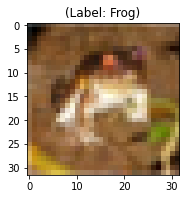

In [8]:
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_list[y_train[0][0]]) + ")"))

Text(0.5, 1.0, '(Label: Cat)')


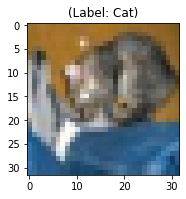

In [9]:
plt.subplot(122)
curr_img = np.reshape(x_test[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_list[y_test[0][0]]) + ")"))

In [10]:
np.min(x_train), np.max(x_train)

(0, 255)

In [11]:
x_train = x_train/255.0
np.min(x_train), np.max(x_train)
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel' + str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat, columns = feat_cols)
df_cifar['Label'] = y_train
print('Size of Data Frame: {}'.format(df_cifar.shape))

Size of Data Frame: (50000, 3073)


In [14]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,Label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [15]:
d0 = df_cifar

In [16]:
l = d0['Label']

In [17]:
d = d0.drop("Label", axis=1)

In [18]:
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.305882,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725


In [19]:
print(d.shape)

(50000, 3072)


In [20]:
print(l.shape)

(50000,)


In [21]:
labels = l.head(15000)
data = d.head(15000)

In [22]:
print("The shape of the sample data = ",data.shape)

The shape of the sample data =  (15000, 3072)


In [23]:
from sklearn.preprocessing import StandardScaler

In [26]:
std_data = StandardScaler().fit_transform(data)

In [27]:
print(std_data.shape)

(15000, 3072)


In [28]:
# covariance matrix will be :

sample_data = std_data

#matrix multiplication

cov_mat = np.matmul(sample_data.T, sample_data)

In [29]:
cov_mat.shape

(3072, 3072)

In [31]:
#getting the eigen values and eigen vectors

from scipy.linalg import eigh

ei_values, ei_vectors =  eigh(cov_mat, eigvals=(3070,3071))

In [33]:
ei_vectors.shape

(3072, 2)

In [34]:
ei_vectors = ei_vectors.T

In [35]:
#updated shape of vectors

ei_vectors.shape

(2, 3072)

In [36]:
new_coord = np.matmul(ei_vectors, sample_data.T)

In [37]:
print("Resultant of the new data points shape ", ei_vectors.shape, "X", sample_data.T.shape," = ", new_coord.shape)

Resultant of the new data points shape  (2, 3072) X (3072, 15000)  =  (2, 15000)


In [39]:
new_coord = np.vstack((new_coord, labels)).T

In [42]:
#new dataframe
dataframe = pd.DataFrame(data=new_coord, columns=("1st_principal", "2nd_principal", "label"))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


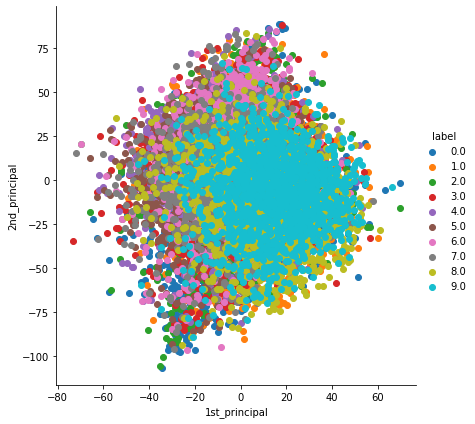

In [44]:
#plotting the 2 dimensional datapoints
sns.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [52]:
###Using scikit learn

In [45]:
from sklearn.decomposition import PCA 
pca = PCA()

In [46]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

In [47]:
pca_data.shape

(15000, 2)

In [48]:
pca_data = np.vstack((pca_data.T, labels)).T

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


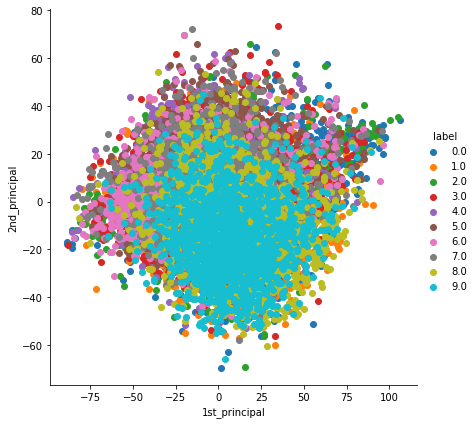

In [50]:
#creating the new dataframe
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

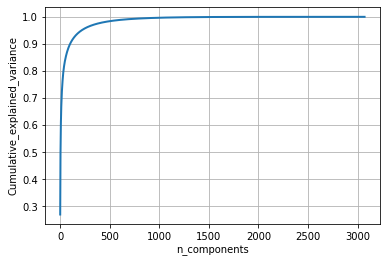

In [53]:
pca.n_components = 3072
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()
